## TEST OpenAltimetry API

## Use icepyx.Query to query datasets

In [22]:
import icepyx as ipx
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from pyproj import CRS
from itertools import compress
import concurrent.futures
import matplotlib.pyplot as plt

short_name = 'ATL06'
date_range = ['2019-4-14','2019-7-1']
bbox = [2, -73, 10, -70]
region = ipx.Query(short_name, bbox, date_range)
filelist_nsidc = region.avail_granules(ids=True, cycles=True, tracks=True)[0]
product = region.dataset
cycle_list  = list(map(int, set(region.avail_granules(ids=True, cycles=True, tracks=True)[1])))
extent_type, spat_extent = region.spatial_extent
print (filelist_nsidc)
print (product)
print (cycle_list)
print (extent_type, spat_extent)

##### filter filelists only return latest cycle #####
filelist = filelist_latestcycle(filelist_nsidc, cycle_list)

['ATL06_20190414064539_02440312_003_01.h5', 'ATL06_20190417174935_02970310_003_01.h5', 'ATL06_20190418063718_03050312_003_01.h5', 'ATL06_20190421174115_03580310_003_01.h5', 'ATL06_20190422062858_03660312_003_01.h5', 'ATL06_20190422171536_03730310_003_01.h5', 'ATL06_20190425173255_04190310_003_01.h5', 'ATL06_20190426062038_04270312_003_01.h5', 'ATL06_20190426170716_04340310_003_01.h5', 'ATL06_20190427055459_04420312_003_01.h5', 'ATL06_20190429172434_04800310_003_01.h5', 'ATL06_20190430061217_04880312_003_01.h5', 'ATL06_20190430165855_04950310_003_01.h5', 'ATL06_20190501054638_05030312_003_01.h5', 'ATL06_20190503171614_05410310_003_01.h5', 'ATL06_20190504060357_05490312_003_01.h5', 'ATL06_20190504165035_05560310_003_01.h5', 'ATL06_20190505053818_05640312_003_01.h5', 'ATL06_20190507170754_06020310_003_01.h5', 'ATL06_20190508055537_06100312_003_01.h5', 'ATL06_20190508164215_06170310_003_01.h5', 'ATL06_20190509052958_06250312_003_01.h5', 'ATL06_20190511165934_06630310_003_01.h5', 'ATL06_201

## Visualization 

In [55]:
# import visualize module
from visualization import Visualize
OA_viz = Visualize(filelist, bbox, product)

In [23]:
%%time
oa_data = OA_viz.parallel_request_OA()
print (len(oa_data))

Requesting data for elevation visualization, please wait...
4220788
CPU times: user 39.1 s, sys: 8.89 s, total: 48 s
Wall time: 2min 11s


In [27]:
%%time
OA_viz.visualize_elevations_holoview(oa_data)

CPU times: user 3.16 s, sys: 385 ms, total: 3.54 s
Wall time: 3.18 s


:DynamicMap   []
   :Overlay
      .Tiles.I :Tiles   [x,y]
      .RGB.I   :RGB   [x,y]   (R,G,B,A)

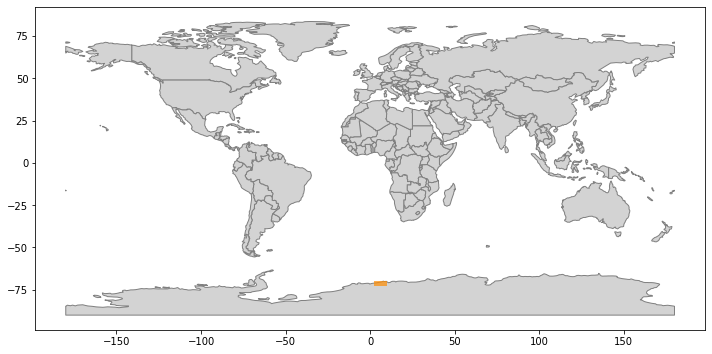

In [28]:
OA_viz.visualize_spatial_extent('bounding_box', spat_extent)

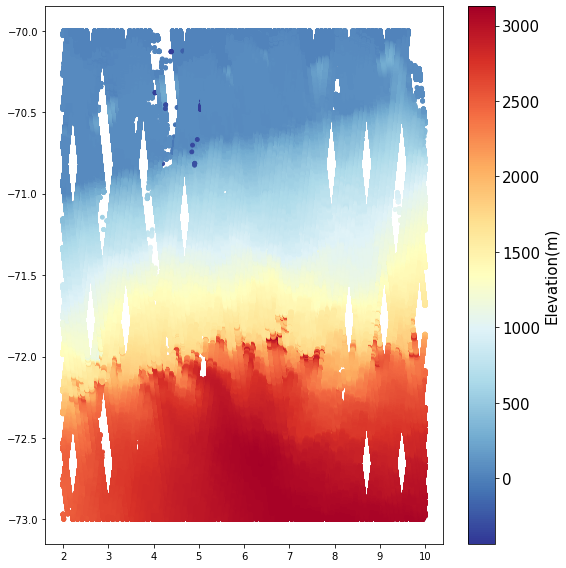

CPU times: user 3min 28s, sys: 6.67 s, total: 3min 35s
Wall time: 3min 40s


In [29]:
%%time
OA_viz.visualize_elevation_matplotlib(oa_data)